### Passing in clean data from last week.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [87]:
df = pd.read_csv('C:/Users/Bhatt/src/Tamid-TechEdu-S22/Week6/better_house_data.csv')

### Some Extra Cleaning

In [88]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,price_per_sqft_x_1000
0,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.0,0.046154,46.153846
1,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.0,0.062459,62.458909
2,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.0,0.032479,32.478632
3,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.0,0.105925,105.924596
4,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.0,0.038000,38.000000
...,...,...,...,...,...,...,...,...,...,...
5650,Built-up Area,Ready To Move,Bannerghatta Road,3 BHK,1527.0,3.0,1.0,142.0,0.092993,92.992796
5651,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,1345.0,2.0,1.0,57.0,0.042379,42.379182
5652,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.0,0.065306,65.306122
5653,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.0,0.066898,66.898349


### Plotting the data

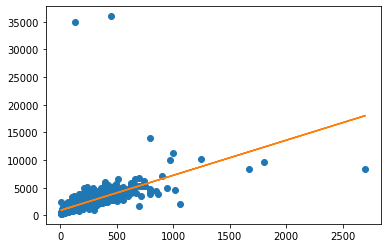

In [89]:
xCol = "price"
yCol = "total_sqft"
plt.plot(xCol, yCol, data=df, linestyle='none', marker='o')
m, b = np.polyfit(df[xCol], df[yCol], 1)
plt.plot(df[xCol], m * df[xCol] + b)
plt.show()

From this plot, we can conclude that price and total square feet have a correlation. Their means must differ, but they must have a relation.

Our null hypothesis is that there is no change between price and total sqft. Our alternate hypothesis states the average rate of change between price and total_sqft is not 0. We know the alternate hypothesis is true, but we can never be 100%. Enter: **the linear regression.**

### Regression Analysis

In [90]:
x = df[[xCol]] # the OLS method takes is 2-D series objects, so you MUST double bracket.
y = df[[yCol]]
regression = sm.OLS(x, y)
results = regression.fit() # this is MANDATORY
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                          1.334e+04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):                        0.00
Time:                        17:30:41   Log-Likelihood:                         -32615.
No. Observations:                5655   AIC:                                  6.523e+04
Df Residuals:                    5654   BIC:                                  6.524e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We reject the null hypothesis since the p value (0) is less than the significance value (0.05). 

### Make a new column for the predictions

In [91]:
df["predPrice"] = 1

### Use the linear regression to results to create a predicted price (x) value.

In [92]:
predictions = results.predict()
df['predPrice'] = pd.Series(predictions)
df.drop(columns=["price_per_sqft", "price_per_sqft_x_1000"], inplace=True)
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,predPrice
0,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.0,170.364116
1,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.0,99.663008
2,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.0,76.663852
3,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.0,182.486178
4,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.0,65.524660
...,...,...,...,...,...,...,...,...,...
5650,Built-up Area,Ready To Move,Bannerghatta Road,3 BHK,1527.0,3.0,1.0,142.0,100.056156
5651,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,1345.0,2.0,1.0,57.0,88.130668
5652,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.0,112.374792
5653,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.0,226.256651


Our predictions don't look too bad! Let's compare them with a visual.

<AxesSubplot:title={'center':'Data Distribution for Actual and Predicted'}, xlabel='predPrice', ylabel='Density'>

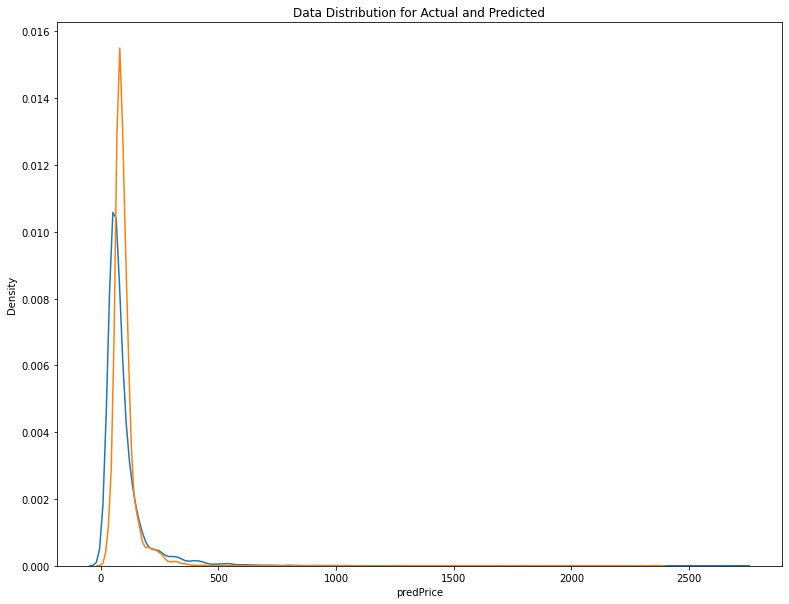

In [93]:
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(13,10))
plt.title('Data Distribution for Actual and Predicted')
sns.distplot(df['price'], hist=False, label="Actual", ax=ax)
sns.distplot(df['predPrice'], hist=False, label="Linear Regression Predictions", ax=ax)

It seems like our model is keeping the predictions dense. This is referred to as **underfitting**. The higher the degree of your regression model, the more accurate our regressions. Let's compare our values using a residual.

<AxesSubplot:>

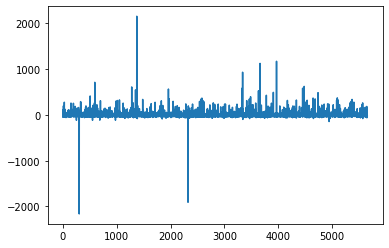

In [94]:
df['Residual'] = df['price'] - df['predPrice']
df['Residual'].plot()

There were quite a few butchered predictions, but that is okay! This is Machine Learning, your model can't be correct every time. 